In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img

#importing necessary libraries

In [43]:
from tensorflow.keras.applications import vgg16 # imports the pre-trained VGG16 model architecture (and its associated utilities) 
                                                # from Keras's 'applications' module. This is an example of a pretrained model  
                                                # that is 16 layers deep

In [44]:
pretrained_model = vgg16.VGG16(weights = 'imagenet') # Specifying weights is important 
                                                     #This line loads a pretrained VGG16 model (a deep convolutional neural network) 
                                                     # with weights trained on the ImageNet dataset

In [77]:
pretrained_model.summary() # prints a detailed summary of the VGG16 model architecture that you load with:

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [46]:
path = r"C:\Users\HP\Downloads\imagenet_class_index.json" # assigns the file path of a JSON file (imagenet_class_index.json) to the variable path.

In [47]:
classes = pd.read_json(path)
classes

,0,1,2,3,4,5,6,7,8,9,10
0,n01440764,n01443537,n01484850,n01491361,n01494475,n01496331,n01498041,n01514668,n01514859,n01518878,n01530575
1,tench,goldfish,great_white_shark,tiger_shark,hammerhead,electric_ray,stingray,cock,hen,ostrich,brambling


In [48]:
classes.T # Using the transpose function to display the data column-wise

,0,1
0,n01440764,tench
1,n01443537,goldfish
2,n01484850,great_white_shark
3,n01491361,tiger_shark
4,n01494475,hammerhead
5,n01496331,electric_ray
6,n01498041,stingray
7,n01514668,cock
8,n01514859,hen
9,n01518878,ostrich


In [49]:
classes.T[1] # Representing series

0                 tench
1              goldfish
2     great_white_shark
3           tiger_shark
4            hammerhead
5          electric_ray
6              stingray
7                  cock
8                   hen
9               ostrich
10            brambling
Name: 1, dtype: object

In [50]:
classes.T[[1]] # Representing dataframe

,1
0,tench
1,goldfish
2,great_white_shark
3,tiger_shark
4,hammerhead
5,electric_ray
6,stingray
7,cock
8,hen
9,ostrich


In [51]:
classes = classes.T[[1]] # Assigning the DataFrame to variable 'classes'

In [52]:
classes_dict = classes.to_dict()[1] # converts a data structure (classes) into a dictionary using the .to_dict() method and 
                                    # then retrieves the value associated with the column 1


In [53]:
print(classes_dict[2])
print(classes_dict[4])

great_white_shark
hammerhead


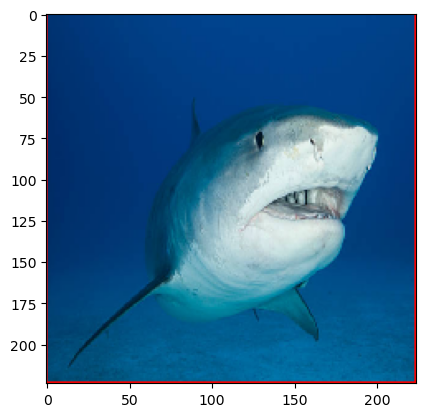

In [54]:
image = r"C:\Users\HP\OneDrive\Pictures\Camera Roll\Tiger Shark.png"
image = load_img(image, target_size = (224,224))
image = np.array(image)
plt.imshow(image)
preprocessed_image = vgg16.preprocess_input(image)

# Why resize?
# Ans: VGG16 was originally trained on the ImageNet dataset, where all images were resized to 224×224 pixels. So:
# Its weights, kernel sizes, and fully connected layers are all optimized for this fixed input size.
# Feeding in images of a different size can cause dimension mismatches or incorrect feature extraction.

# The 'preprocess_input' step is necessary since, we cannot use the raw input of the image,
# it needs to be pre-processed. Vgg16 has a built-in function for this 'vgg16.preprocess_input' --> Converts 
# RGB to BGR and makes the image compatible with the VGG16 model’s expectations.

In [55]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

In [56]:
layer = pretrained_model.layers[:-1]

In [57]:
new_model = Sequential()
for layer in pretrained_model.layers[:-1]:
    layer.trainable = False
    new_model.add(layer)
new_model.add(Dense(units = 1, activation = 'sigmoid'))

# pretrained_model.layers[:-1]: excluding the final classification layer, which is typically specific to the original task (e.g., 1000 classes in ImageNet)
# layer.trainable = False: Freezes each layer, so its weights will not be updated during training. Why? We want to keep the learned 
# features from the pre-trained model (like edge detectors, textures, etc.). Freezing also reduces training time and prevents overfitting, 
# especially when the new dataset is small.
# new_model.add(layer): Adds each frozen layer to the new model.
# Dense(1) → 1 neuron (for binary classification)
# activation='sigmoid' → outputs a probability between 0 and 1.

In [58]:
import glob
# glob is a module that helps you find files and directories that match a specific pattern.
# These patterns are similar to the ones you might use in a command-line shell and often include wildcard characters 
# like * (matches any number of characters)

In [59]:
planes_path = glob.glob(r"C:\Users\HP\Downloads\Read CSV files\Planes\*")
cars_path = glob.glob(r"C:\Users\HP\Downloads\Read CSV files\Cars Data\*")

In [60]:
def prepare_data(input_path = None):  
    image = load_img(input_path, target_size = (224,224,3))
    image = np.array(image)
    preprocessed_image = vgg16.preprocess_input(image)
    return preprocessed_image
# First line 'prepare_data(input_path = None)'takes one optional argument: input_path. 
# This argument is expected to be the file path to the image you want to process. If no path is provided, it defaults to None.

# Third line 'saved_image = np.array(saved_image)' converts image into an array.conversion is crucial because deep learning 
# frameworks like TensorFlow and Keras operate on numerical data

# fourth line 'preprocessed_image = vgg16.preprocess_input(image)'  performs specific normalization and scaling operations 
# required by the VGG16 model like converting RGB to BGR:

In [61]:
x = []
y = []
for i in range(len(planes_path)):
     x.append(prepare_data(planes_path[i]))
     y.append(0)

for i in range(len(cars_path)):
     x.append(prepare_data(cars_path[i]))
     y.append(1)

In [62]:
print(len(x))

100


In [63]:
print(len(y))

100


In [64]:
x = np.array(x)
y = np.array(y)

In [65]:
print(x.shape)
print(y.shape)

(100, 224, 224, 3)
(100,)


In [66]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

In [67]:
new_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['Accuracy'])

In [68]:
new_model.fit(x, y, epochs = 25, validation_split = 0.30, batch_size = 32, shuffle = True)

Epoch 1/25
3/3 [==============================] - 30s 9s/step - loss: 0.6652 - Accuracy: 0.6286 - val_loss: 0.4300 - val_Accuracy: 0.8333
Epoch 2/25
3/3 [==============================] - 26s 9s/step - loss: 0.0906 - Accuracy: 0.9714 - val_loss: 0.1130 - val_Accuracy: 0.9333
Epoch 3/25
3/3 [==============================] - 29s 10s/step - loss: 0.0230 - Accuracy: 1.0000 - val_loss: 0.0508 - val_Accuracy: 0.9667
Epoch 4/25
3/3 [==============================] - 25s 9s/step - loss: 0.0079 - Accuracy: 1.0000 - val_loss: 0.0313 - val_Accuracy: 1.0000
Epoch 5/25
3/3 [==============================] - 26s 9s/step - loss: 0.0036 - Accuracy: 1.0000 - val_loss: 0.0229 - val_Accuracy: 1.0000
Epoch 6/25
3/3 [==============================] - 29s 10s/step - loss: 0.0023 - Accuracy: 1.0000 - val_loss: 0.0186 - val_Accuracy: 1.0000
Epoch 7/25
3/3 [==============================] - 27s 9s/step - loss: 0.0015 - Accuracy: 1.0000 - val_loss: 0.0161 - val_Accuracy: 1.0000
Epoch 8/25
3/3 [================

In [69]:
def prepare_data(input_path = None, batch = False):
    image = load_img(input_path, target_size = (224,224,3))
    image = np.array(image)
    preprocessed_image = vgg16.preprocess_input(image)
    if batch:
        preprocessed_image = preprocessed_image.reshape(224,224,3)
    else:
        preprocessed_image = preprocessed_image.reshape(1,224,224,3)
    return preprocessed_image

In [73]:
test_image1 = prepare_data(input_path = r"C:\Users\HP\OneDrive\Pictures\Camera Roll\prime air.png", batch = False)

In [74]:
new_model.predict(pred)
# Note the value of 7.0948914e-08 is approximately = 0 which successfully classifies the image as plane

1/1 [==============================] - 0s 275ms/step


array([[7.0948914e-08]], dtype=float32)

In [75]:
test_image2 = prepare_data(input_path = r"C:\Users\HP\OneDrive\Pictures\Camera Roll\car_image_prediction.jpg", batch = False)

In [76]:
new_model.predict(test_image2)
# Note the value of 0.9992531 is approximately = 1 which successfully classifies the image as Car

1/1 [==============================] - 0s 288ms/step


array([[0.9992531]], dtype=float32)

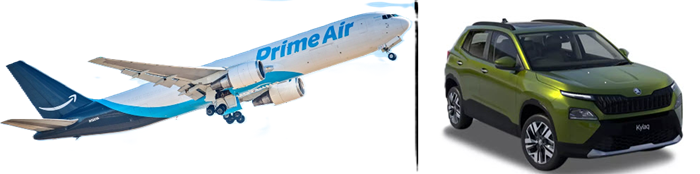
